In [1]:
import sys
sys.path.append('..')

from Controllers.ILQG_Gravity import  *

In [2]:
x=ILQG(Duration =  .4,start = [20,-33],targets=[50,-33],K = 100,Noise = False,r1 = 1e-3)[3]

x=ILQG(Duration = .4,start = [50,-33],targets=[20,-33],K = 100,Noise = False,r1 = 1e-3)[3]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 2)

In [ ]:
def compute_h(x, y, l1, l2):
    """
    Computes h1 using the given equation.

    Parameters:
        x (float): x-coordinate of the end effector.
        y (float): y-coordinate of the end effector.
        l1 (float): Length of the first link.
        l2 (float): Length of the second link.

    Returns:
        h1 (float): Computed angle in radians.
    """


    # Compute the second term: arccos formula
    r_squared = x**2 + y**2


    # Final h1 calculation
    h1 = np.arctan2(y, x) - np.arccos((r_squared + l1**2 - l2**2) / (2 * l1 * np.sqrt(r_squared)))


    # Compute h2
    h2 = np.pi - np.arccos((l1**2 + l2**2 - r_squared) / (2 * l1 * l2))
    return h1,h2

# Example usage
x, y = -40,-30   # Position of the end effector
l1, l2 = 30, 33  # Link lengths

h1,h2 = compute_h(x, y, l1, l2)
print(h1/pi*180,h2/pi*180)
print(l1*np.cos(h1)+l2*np.cos(h1+h2))
print(l1*np.sin(h1)+l2*np.sin(h1+h2))

-182.74627101775263 75.04378549411194
-40.0
-30.000000000000004


[ -2.74627102  75.04378549 -53.99069249 101.33029688]


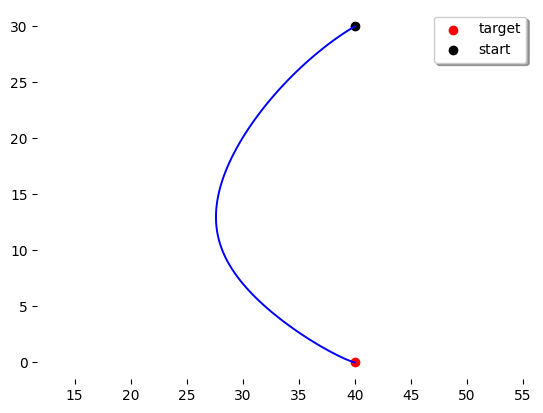

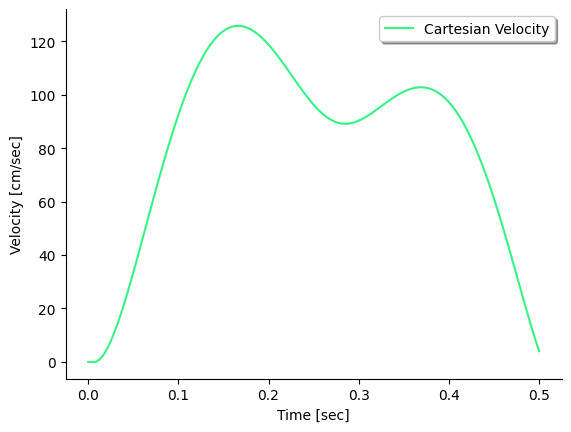

[-53.99069249 101.33029688  -2.74627102  75.04378549]


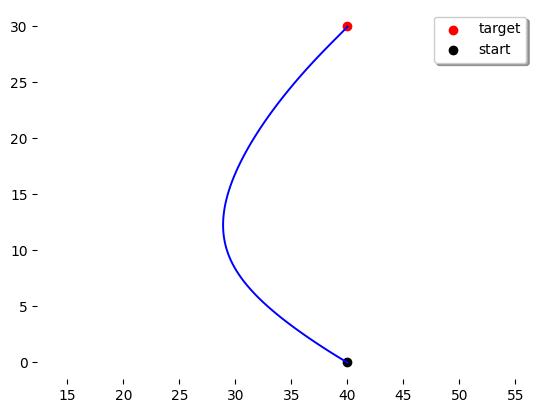

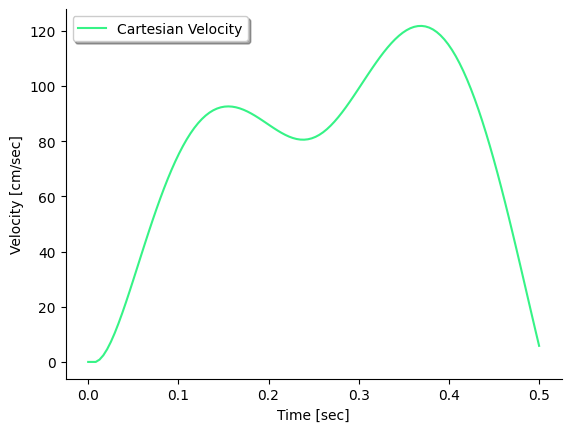

In [ ]:
w1,w2,r1 = 1e4,1,1e-3

x=ILQG(Duration = .5,start = [40,30],targets=[40,0],K = 120,Noise = False,w1 = w1,w2=w2,r1 = r1)[3]

x=ILQG(Duration = .5,start = [40,0],targets=[40,30],K = 120,Noise = False,w1 = w1,w2=w2,r1 = r1)[3]